## ABOUT DATASET

## Description

#### This dataset is synthetically generated to mimic weather data for data analyse. It includes various weather-related features and categorizes the weather into four types: Rainy, Sunny, Cloudy, and Snowy. In this dataset to perform data preprocessing, visualization and remove the outliers finally i implement the statistical test.

## Variables

####    -> Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
####    -> Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
####    -> Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
####    -> Precipitation (%) (numeric): The precipitation percentage, including outlier values.
####    -> Cloud Cover (categorical): The cloud cover description.
####    -> Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
####    -> UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
####    -> Season (categorical): The season during which the data was recorded.
####    -> Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
####    -> Location (categorical): The type of location where the data was recorded.
####    -> Weather Type (categorical): The target variable for classification, indicating the weather type.


## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from prettytable import PrettyTable
import missingno as msno

## LOAD THE DATA

In [2]:
## Read the file.

df = pd.read_csv("Weather_Type.csv")
df

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                   1010.82         2  Winter              3.5    inland   
1                   1011.43         7  Spring             10.0    inland   
2                   1018.72         5  Spring              5.5  mountain   
3                   1026.25         7  Spring              1.0   coastal   
4                    990.67         1  Winter              2.5  mountain   
...                     ...       ...     ...              ...       ...   
13195               1003.15         1  Summer              1.0  mountain   
13196               1067.23         1  Winter              6.0   coastal   
13197               1012.69         3  Autumn              9.0   coastal   
13198                984.27         0  Winter              2.0    inland   
13199               1015.37         5  Autumn             10.0  mountain   

      Weather Type  
0            Rainy  
1           Cloudy  
2            Sunny  
3            Sunny  
4            Rainy  
...            ...  
13195        Rainy  
13196        Snowy  
13197       Cloudy  
13198        Snowy  
13199        Rainy  

[13200 rows x 11 columns]

## Describe the Columns

#### -> . TEMPERATURE - -15 C = Extreme Cold , 45 C = Extreme Heat
#### -> . HUMIDITY - Humidity levels are influenced by temperature. 0% (completely dry air) to 100% (air is fully saturated with moisture).
#### -> . WIND SPEED - meters per second (m/s), kilometers per hour (km/h), or miles per hour (mph).
#### -> . PRECIPITATION - Liquid water droplets falling from the sky."precipitation" refers to any form of water—liquid or solid—that falls from the atmosphere and reaches the ground. This includes rain, snow, sleet, hail, and drizzle.
#### -> . CLOUD COVER - Clear Sky: 0-10% cloud cover. Partly Cloudy: 10-50% cloud cover. Mostly Cloudy: 50-90% cloud cover. Overcast: 90-100% cloud cover.
#### -> . ATMOSPHERIC PRESSURE - 1010 hPa, 995 hPa, or 1025 hPa, indicating the atmospheric pressure. hectopascals-hPa
#### -> . UV INDEX - The UV Index is usually presented on a scale from 0 to 11+, with each number representing a range of UV radiation levels: 0-2 (Low), 3-5 (Moderate), 6-7 (High), 8-10 (Very High), 11+ (Extreme).
#### -> . SEASON - Winter,Spring,Autumn,Summer.
#### -> . VISIBILITY (Km) -  It indicates how far one can see clearly under current atmospheric conditions. Factors: Fog and Mist, Rain and Snow, Haze and Dust.
#### -> . LOCATION - Inland, Mountain, Coastal.
#### -> . WEATHER TYPE - Rainy, Cloudy, Sunny, Snowy.

In [3]:
## It display the first 2 rows for understanding the data.

df.head(2)

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   

   Atmospheric Pressure  UV Index  Season  Visibility (km) Location  \
0               1010.82         2  Winter              3.5   inland   
1               1011.43         7  Spring             10.0   inland   

  Weather Type  
0        Rainy  
1       Cloudy

## DATA EXPLORATION

In [4]:
## It display the column info().

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
## Data type of each feature.

table = PrettyTable()
table.field_names = ['Feature', 'Data Type']

for column in df.columns:
    column_dtype = str(df[column].dtype)
    table.add_row([column, column_dtype])

print(table)

+----------------------+-----------+
|       Feature        | Data Type |
+----------------------+-----------+
|     Temperature      |  float64  |
|       Humidity       |   int64   |
|      Wind Speed      |  float64  |
|  Precipitation (%)   |  float64  |
|     Cloud Cover      |   object  |
| Atmospheric Pressure |  float64  |
|       UV Index       |   int64   |
|        Season        |   object  |
|   Visibility (km)    |  float64  |
|       Location       |   object  |
|     Weather Type     |   object  |
+----------------------+-----------+


In [6]:
## Check the NULL Values

df.isnull().sum().sum()

0

In [7]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

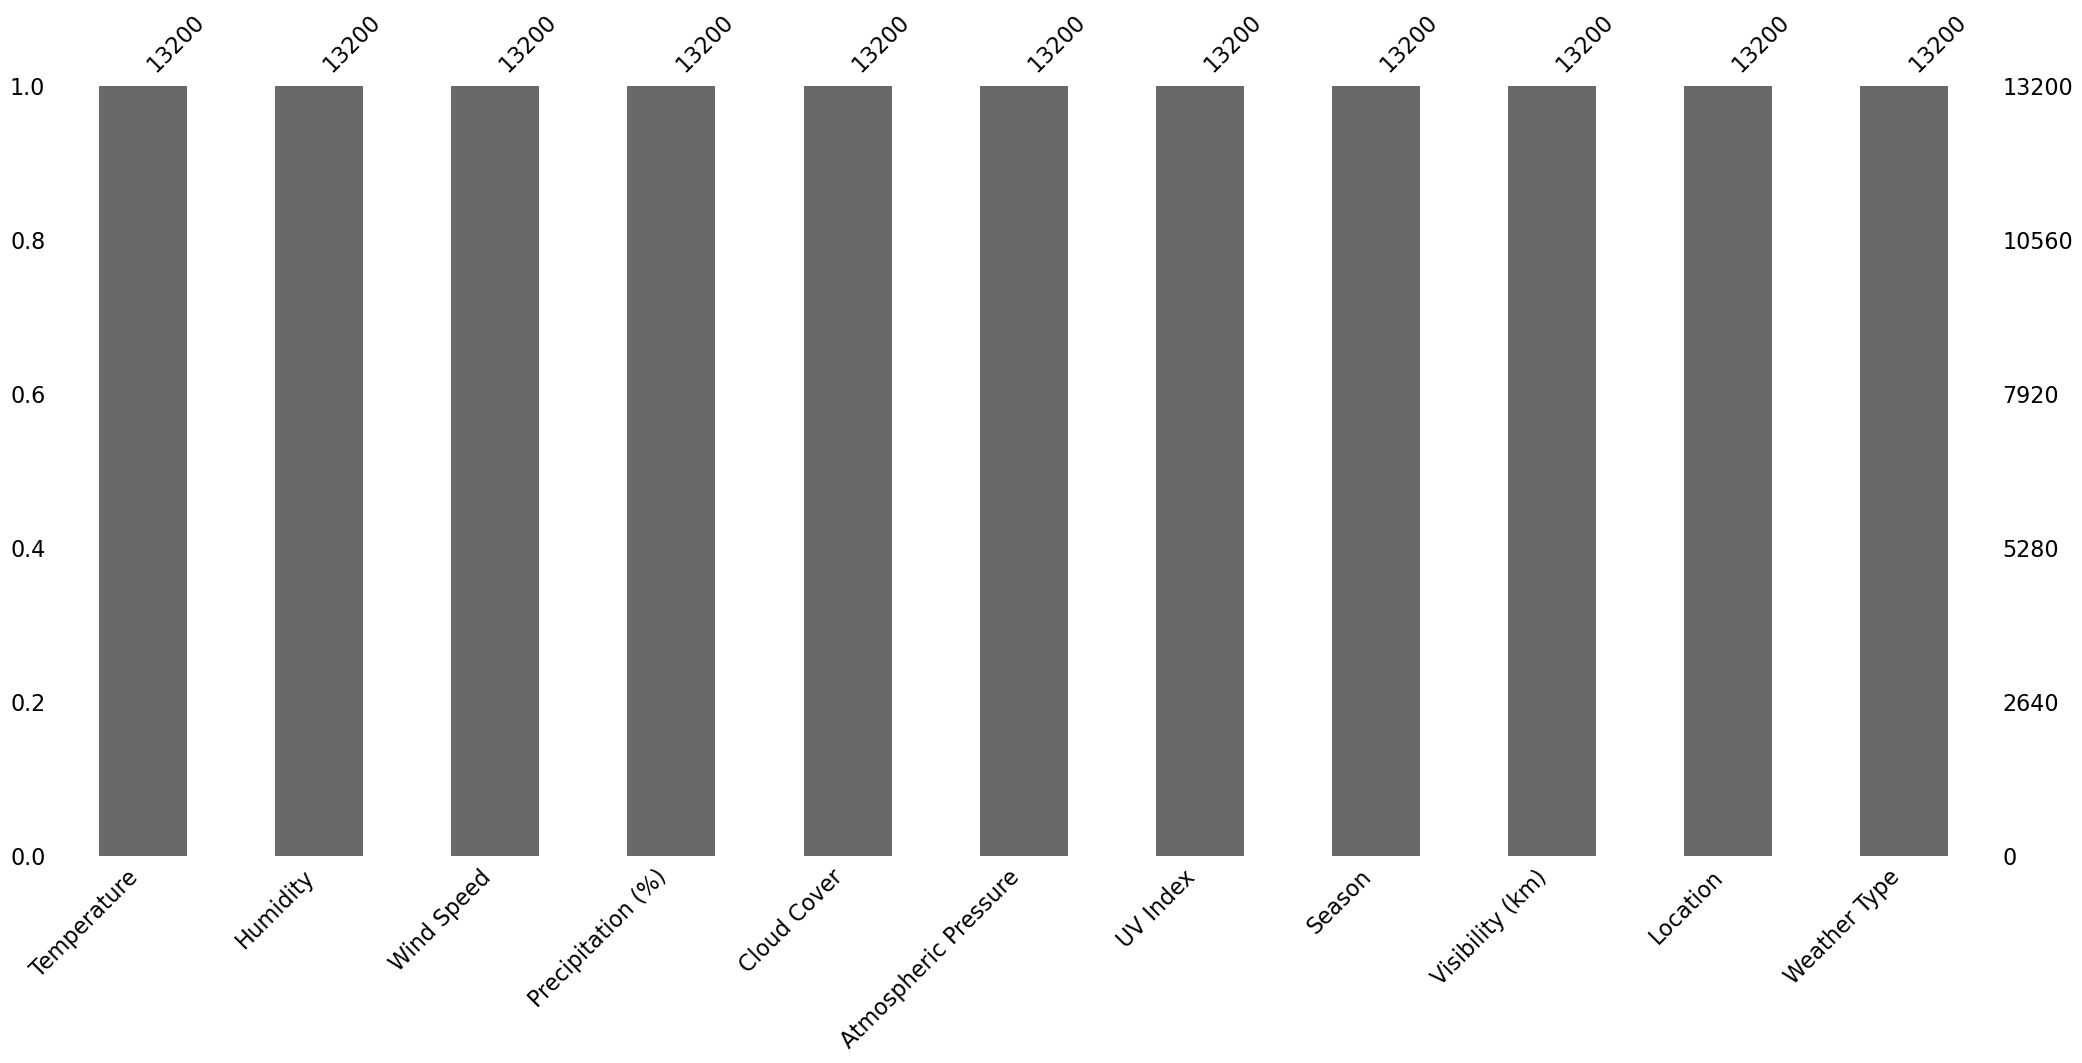

In [8]:
msno.bar(df)

plt.show()

In [9]:
## Number of rows and columns in dataset.

df.shape

(13200, 11)

In [10]:
## It display the column names.

df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

## EDA

In [11]:
## Descriptive analysis of numerical columns

print("Descriptive Analysis")
df.describe().T

Descriptive Analysis


count         mean        std     min    25%      50%  \
Temperature           13200.0    19.127576  17.386327  -25.00    4.0    21.00   
Humidity              13200.0    68.710833  20.194248   20.00   57.0    70.00   
Wind Speed            13200.0     9.832197   6.908704    0.00    5.0     9.00   
Precipitation (%)     13200.0    53.644394  31.946541    0.00   19.0    58.00   
Atmospheric Pressure  13200.0  1005.827896  37.199589  800.12  994.8  1007.65   
UV Index              13200.0     4.005758   3.856600    0.00    1.0     3.00   
Visibility (km)       13200.0     5.462917   3.371499    0.00    3.0     5.00   

                            75%      max  
Temperature             31.0000   109.00  
Humidity                84.0000   109.00  
Wind Speed              13.5000    48.50  
Precipitation (%)       82.0000   109.00  
Atmospheric Pressure  1016.7725  1199.21  
UV Index                 7.0000    14.00  
Visibility (km)          7.5000    20.00

In [12]:
Categorical_columns = df.select_dtypes(include ="object").columns
print(f"Categorical Columns : {Categorical_columns}")

Categorical Columns : Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')


In [13]:
df.describe(include = "object").T

count unique       top  freq
Cloud Cover   13200      4  overcast  6090
Season        13200      4    Winter  5610
Location      13200      3    inland  4816
Weather Type  13200      4     Rainy  3300

## DATA VISUALIZATION

In [14]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [15]:
numerical_col = df.select_dtypes(include = 'number')
numerical_col

Temperature  Humidity  Wind Speed  Precipitation (%)  \
0             14.0        73         9.5               82.0   
1             39.0        96         8.5               71.0   
2             30.0        64         7.0               16.0   
3             38.0        83         1.5               82.0   
4             27.0        74        17.0               66.0   
...            ...       ...         ...                ...   
13195         10.0        74        14.5               71.0   
13196         -1.0        76         3.5               23.0   
13197         30.0        77         5.5               28.0   
13198          3.0        76        10.0               94.0   
13199         -5.0        38         0.0               92.0   

       Atmospheric Pressure  UV Index  Visibility (km)  
0                   1010.82         2              3.5  
1                   1011.43         7             10.0  
2                   1018.72         5              5.5  
3                   1026.25         7              1.0  
4                    990.67         1              2.5  
...                     ...       ...              ...  
13195               1003.15         1              1.0  
13196               1067.23         1              6.0  
13197               1012.69         3              9.0  
13198                984.27         0              2.0  
13199               1015.37         5             10.0  

[13200 rows x 7 columns]

## FINDING OUTLIERS

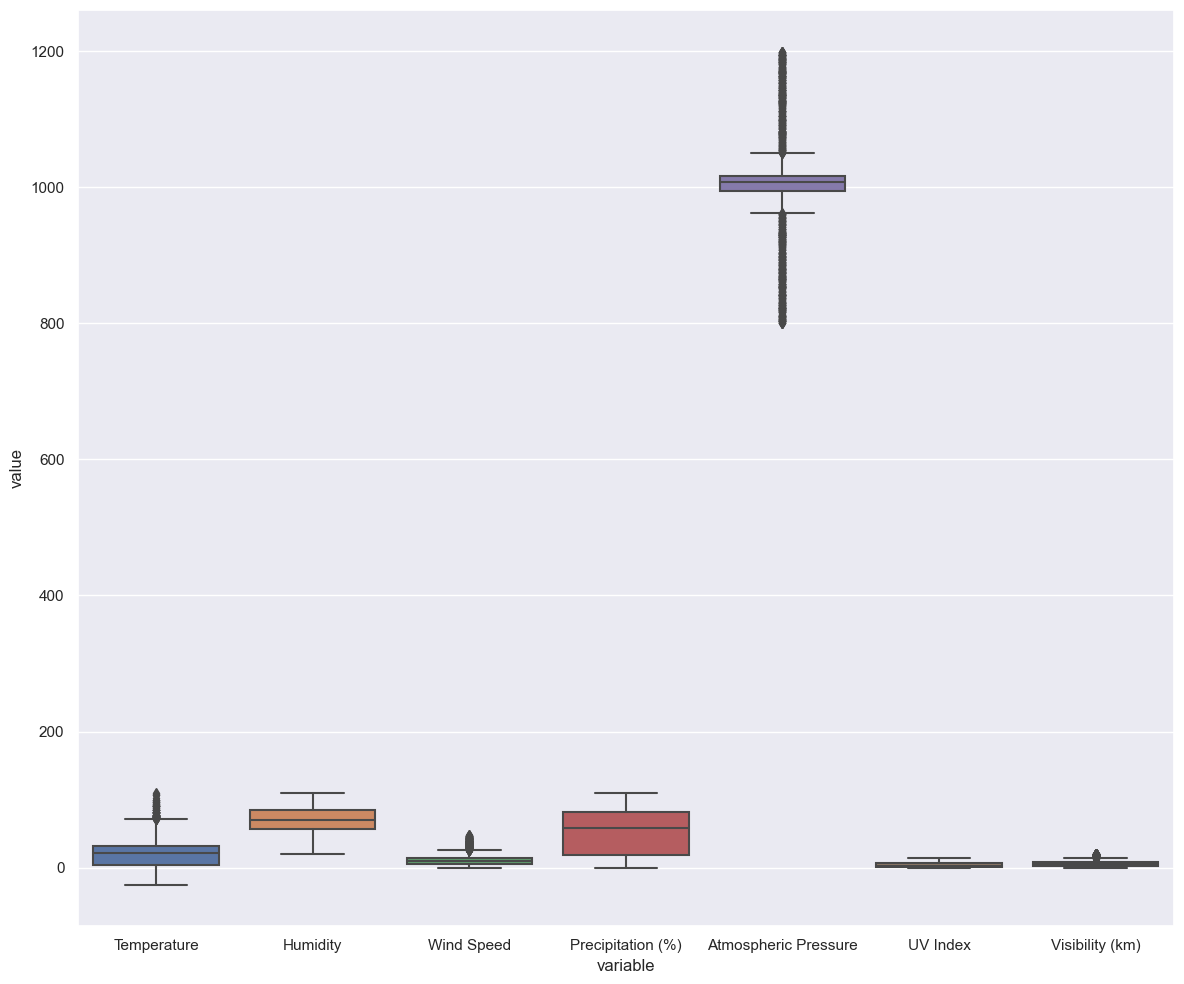

In [16]:
## Outliers shown using boxplots

sns.set(rc ={'figure.figsize':(12,10)})
sns.boxplot(x = 'variable',y = 'value',data = pd.melt(numerical_col))
plt.tight_layout()
plt.show()

## Temperature

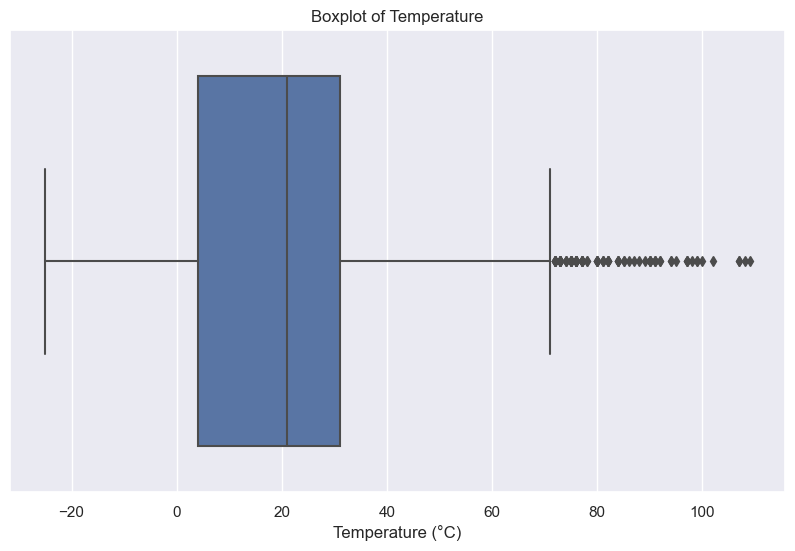

In [20]:
## Create a boxplot for the 'Temperature' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Temperature'])
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature (°C)')
plt.show()


## REMOVING OUTLIERS USING IQR METHOD

## Temperature

In [26]:
## Removing outliers using the IQR method

Q1 = df["Temperature"].quantile(0.25)
Q3 = df["Temperature"].quantile(0.75)
IQR = Q3-Q1
print(f"IQR Value:{IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound:{lower_bound}")
print(f"Upper Bound:{upper_bound}")

## Calculate the median 

median_value = df["Temperature"].median()
print(f"Median Value:{median_value}")

## Replace outliers with the median

df["Temperature"] = np.where((df["Temperature"] < lower_bound) | (df["Temperature"] > upper_bound),median_value,df["Temperature"])

print("Data after Replacing Outliers with Median:\n",df)

IQR Value:26.0
Lower Bound:-35.0
Upper Bound:69.0
Median Value:21.0
Data after Replacing Outliers with Median:
        Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38  

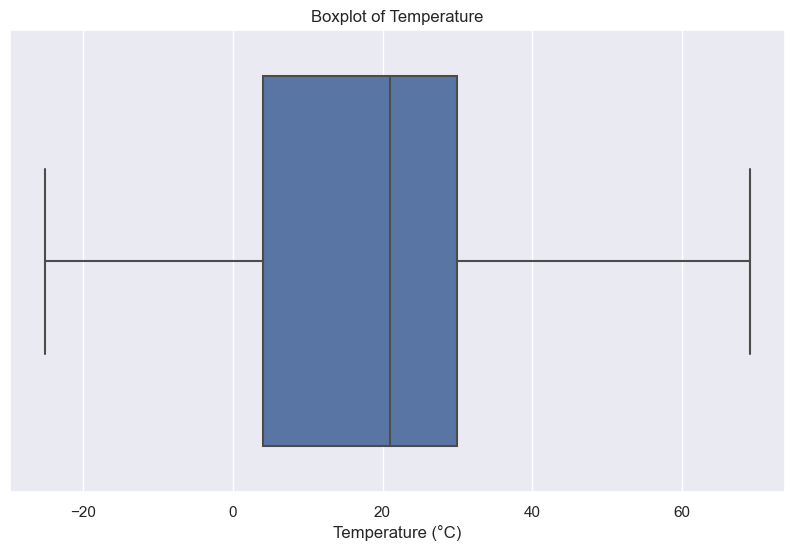

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Temperature'])
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature (°C)')
plt.show()

## Wind Speed

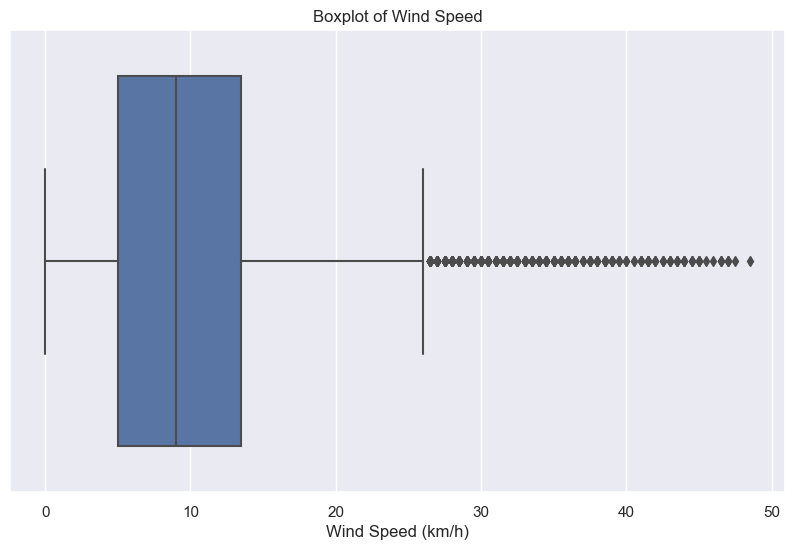

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Wind Speed'])
plt.title('Boxplot of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.show()

In [32]:
## Removing outliers using the IQR method

Q1 = df["Wind Speed"].quantile(0.25)
Q3 = df["Wind Speed"].quantile(0.75)
IQR = Q3-Q1
print(f"IQR Value:{IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound:{lower_bound}")
print(f"Upper Bound:{upper_bound}")

## Calculate the median 

median_value = df["Wind Speed"].median()
print(f"Median Value:{median_value}")

## Replace outliers with the median

df["Wind Speed"] = np.where((df["Wind Speed"] < lower_bound) | (df["Wind Speed"] > upper_bound),median_value,df["Wind Speed"])

print("Data after Replacing Outliers with Median:\n",df)

IQR Value:8.0
Lower Bound:-7.0
Upper Bound:25.0
Median Value:9.0
Data after Replacing Outliers with Median:
        Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38     

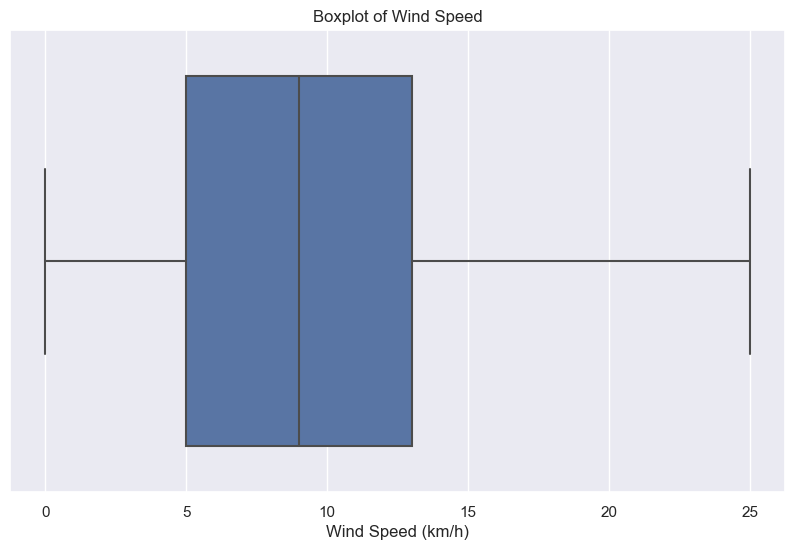

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Wind Speed'])
plt.title('Boxplot of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.show()

## Atmospheric Pressure

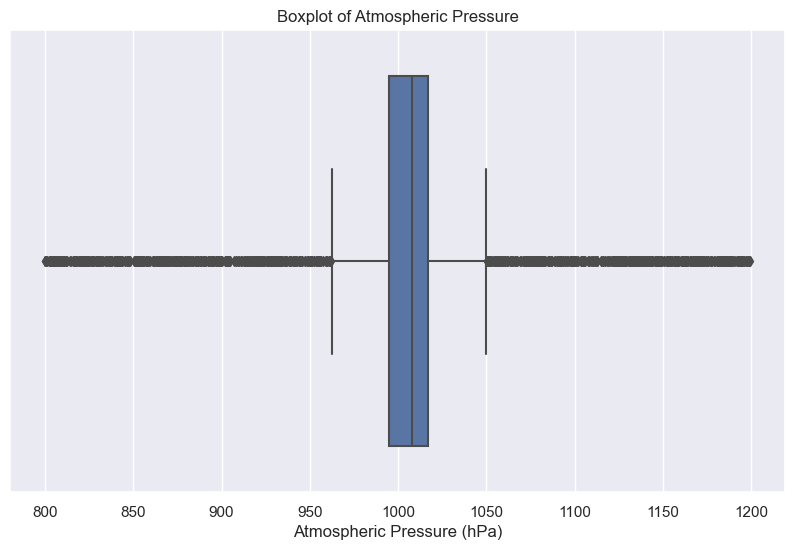

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Atmospheric Pressure'])
plt.title('Boxplot of Atmospheric Pressure')
plt.xlabel('Atmospheric Pressure (hPa)')
plt.show()

In [39]:
## Removing outliers using the IQR method

Q1 = df["Atmospheric Pressure"].quantile(0.25)
Q3 = df["Atmospheric Pressure"].quantile(0.75)
IQR = Q3-Q1
print(f"IQR Value:{IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound:{lower_bound}")
print(f"Upper Bound:{upper_bound}")

## Calculate the median 

median_value = df["Atmospheric Pressure"].median()
print(f"Median Value:{median_value}")

## Replace outliers with the median

df["Atmospheric Pressure"] = np.where((df["Atmospheric Pressure"] < lower_bound) | (df["Atmospheric Pressure"] > upper_bound),median_value,df["Atmospheric Pressure"])

print("Data after Replacing Outliers with Median:\n",df)

IQR Value:19.012499999999932
Lower Bound:968.0787500000001
Upper Bound:1044.1287499999999
Median Value:1007.65
Data after Replacing Outliers with Median:
        Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0      

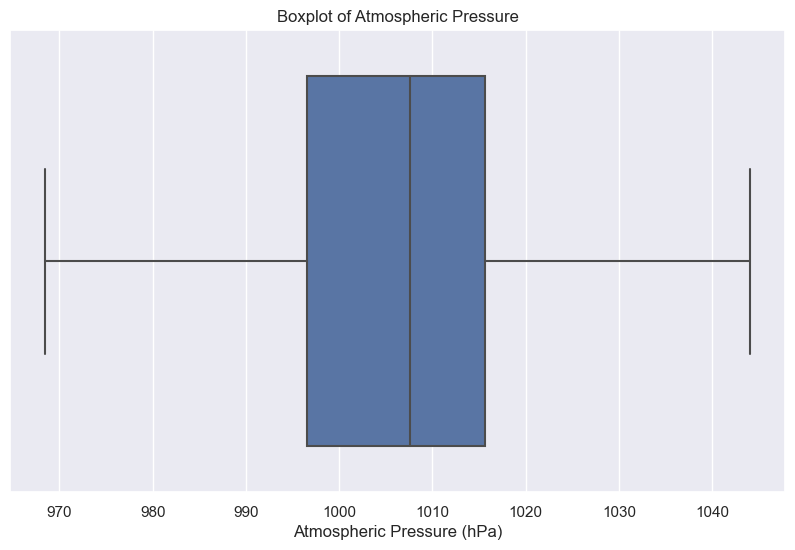

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Atmospheric Pressure'])
plt.title('Boxplot of Atmospheric Pressure')
plt.xlabel('Atmospheric Pressure (hPa)')
plt.show()

## Visibility (Km)

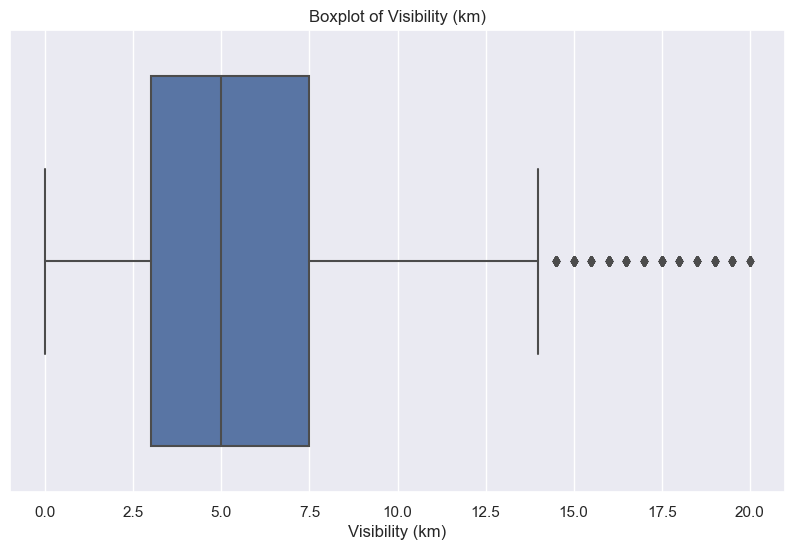

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Visibility (km)'])
plt.title('Boxplot of Visibility (km)')
plt.xlabel('Visibility (km)')
plt.show()

In [45]:
## Removing outliers using the IQR method

Q1 = df["Visibility (km)"].quantile(0.25)
Q3 = df["Visibility (km)"].quantile(0.75)
IQR = Q3-Q1
print(f"IQR Value:{IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound:{lower_bound}")
print(f"Upper Bound:{upper_bound}")

## Calculate the median 

median_value = df["Visibility (km)"].median()
print(f"Median Value:{median_value}")

## Replace outliers with the median

df["Visibility (km)"] = np.where((df["Visibility (km)"] < lower_bound) | (df["Visibility (km)"] > upper_bound),median_value,df["Visibility (km)"])

print("Data after Replacing Outliers with Median:\n",df)

IQR Value:4.0
Lower Bound:-3.0
Upper Bound:13.0
Median Value:5.0
Data after Replacing Outliers with Median:
        Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38     

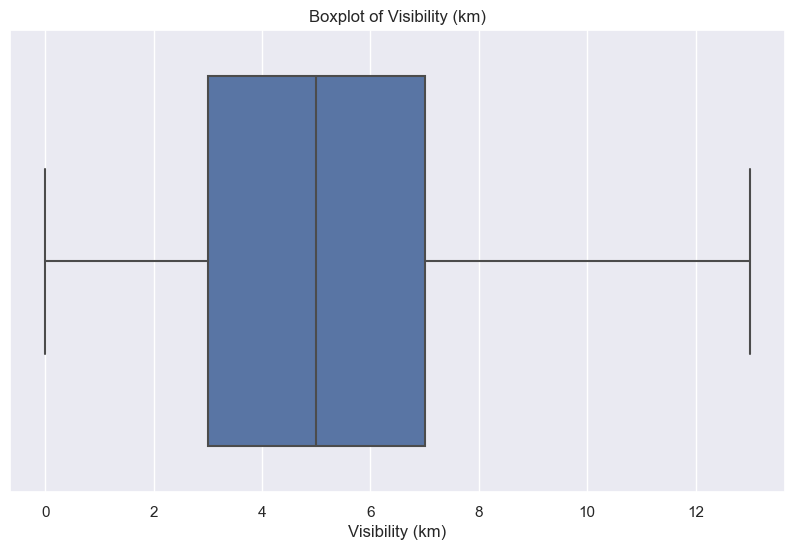

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Visibility (km)'])
plt.title('Boxplot of Visibility (km)')
plt.xlabel('Visibility (km)')
plt.show()

## DATA VISUALIZATION

## BAR CHART

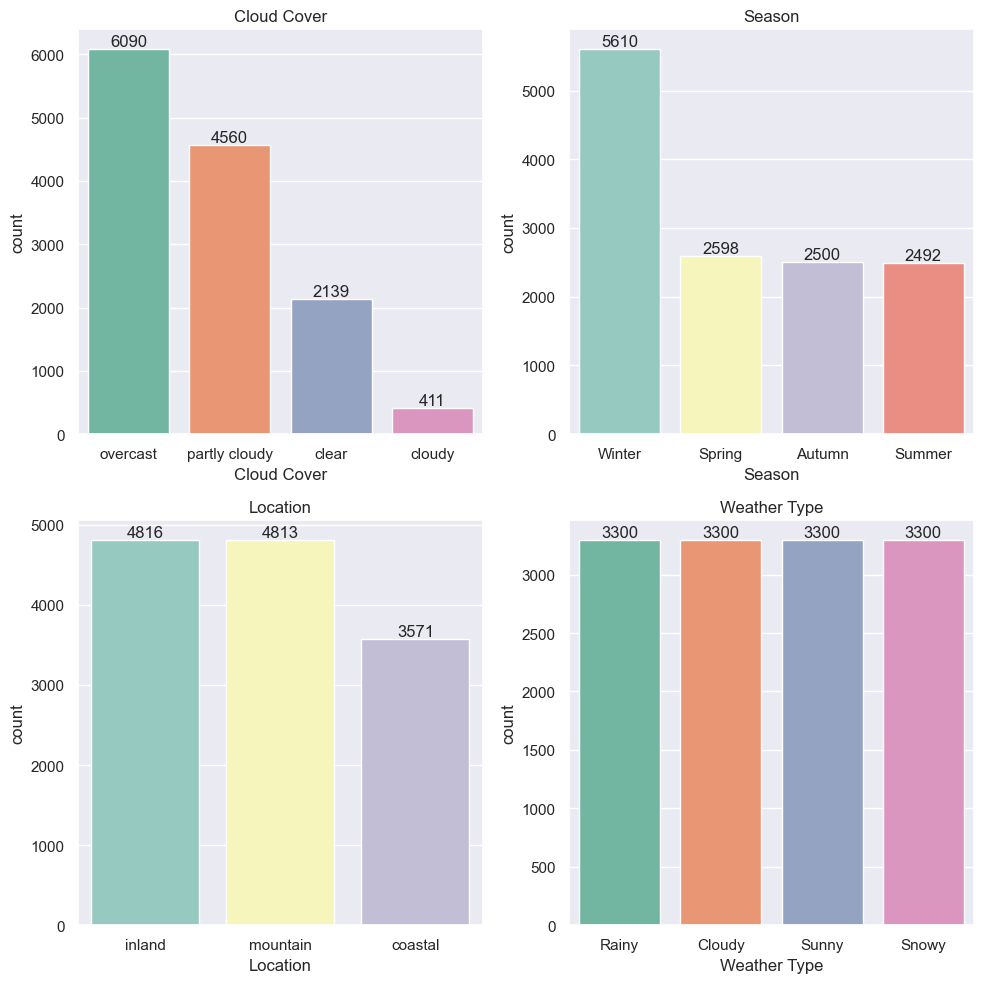

In [48]:
## Visualising Categorical columns

plt.figure(figsize=(10, 10))

# Cloud Cover
plt.subplot(2,2,1)
ax = sns.countplot(x = df['Cloud Cover'],order=df['Cloud Cover'].value_counts(ascending=False).index,palette = 'Set2');
abs_values = df['Cloud Cover'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("Cloud Cover")
plt.title("Cloud Cover")

#Season
plt.subplot(2,2,2)
ax1 = sns.countplot(x = df['Season'],order=df['Season'].value_counts(ascending=False).index, palette = 'Set3');
abs1_values = df['Season'].value_counts(ascending=False).values
ax1.bar_label(container=ax1.containers[0], labels=abs1_values)
plt.xlabel("Season")
plt.title("Season")

#Location
plt.subplot(2,2,3)
ax2 = sns.countplot(x = df['Location'],order=df['Location'].value_counts(ascending=False).index, palette = 'Set3');
abs2_values = df['Location'].value_counts(ascending=False).values
ax2.bar_label(container=ax2.containers[0], labels=abs2_values)
plt.xlabel("Location")
plt.title("Location")

#Weather Type
plt.subplot(2,2,4)
ax3 = sns.countplot(x = df['Weather Type'],order=df['Weather Type'].value_counts(ascending=False).index, palette = 'Set2');
abs3_values = df['Weather Type'].value_counts(ascending=False).values
ax3.bar_label(container=ax3.containers[0], labels=abs3_values)
plt.xlabel("Weather Type")
plt.title("Weather Type")

plt.tight_layout()
plt.show()

## LINE PLOT

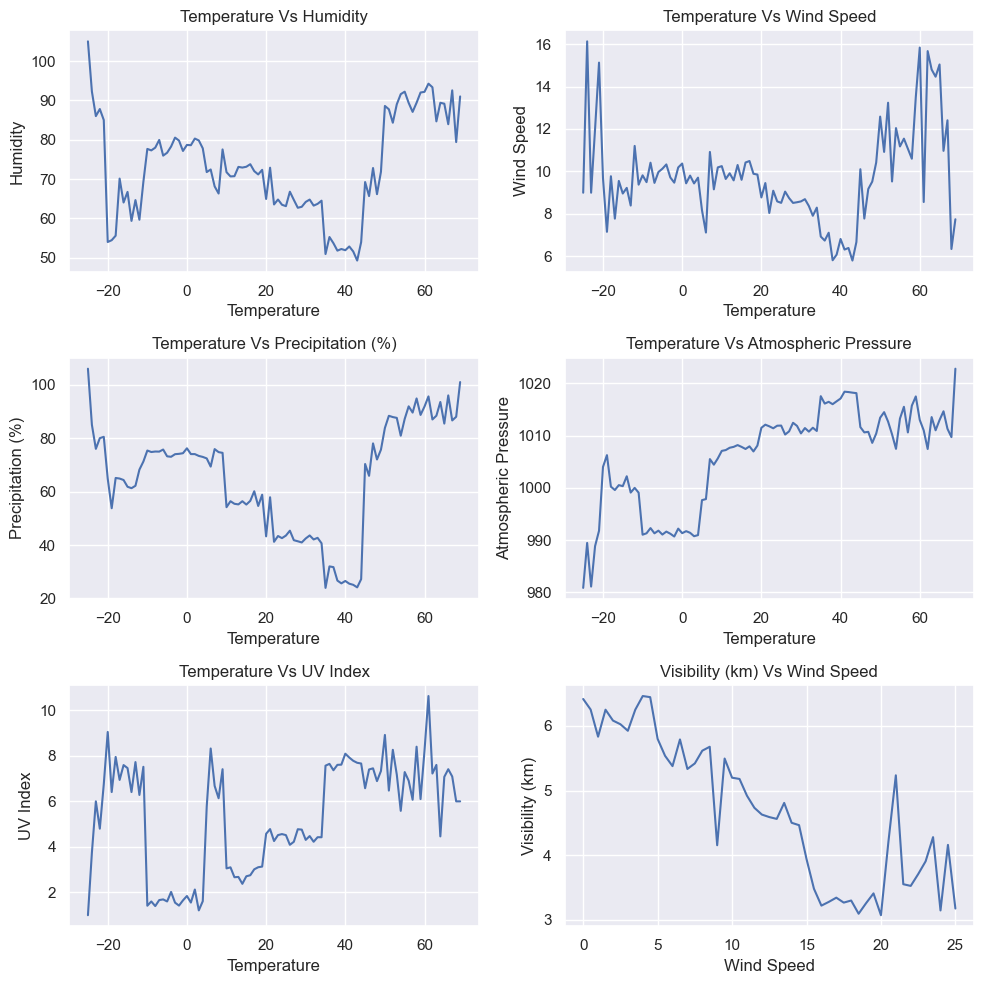

In [49]:
plt.figure(figsize =(10,10))

plt.subplot(3,2,1)
sns.lineplot(x = 'Temperature', y ='Humidity',data = df,ci = None)
plt.title("Temperature Vs Humidity")

plt.subplot(3,2,2)
sns.lineplot(x = 'Temperature', y ='Wind Speed', data =df,ci = None)
plt.title("Temperature Vs Wind Speed")

plt.subplot(3,2,3)
sns.lineplot(x = 'Temperature', y ='Precipitation (%)', data =df,ci = None)
plt.title("Temperature Vs Precipitation (%)")

plt.subplot(3,2,4)        
sns.lineplot(x = 'Temperature', y ='Atmospheric Pressure', data =df,ci = None)
plt.title("Temperature Vs Atmospheric Pressure")

plt.subplot(3,2,5)        
sns.lineplot(x = 'Temperature', y ='UV Index', data =df,ci = None)
plt.title("Temperature Vs UV Index")

plt.subplot(3,2,6)
sns.lineplot(y = 'Visibility (km)', x ='Wind Speed', data =df,ci = None)
plt.title("Visibility (km) Vs Wind Speed")

plt.tight_layout()
plt.show()

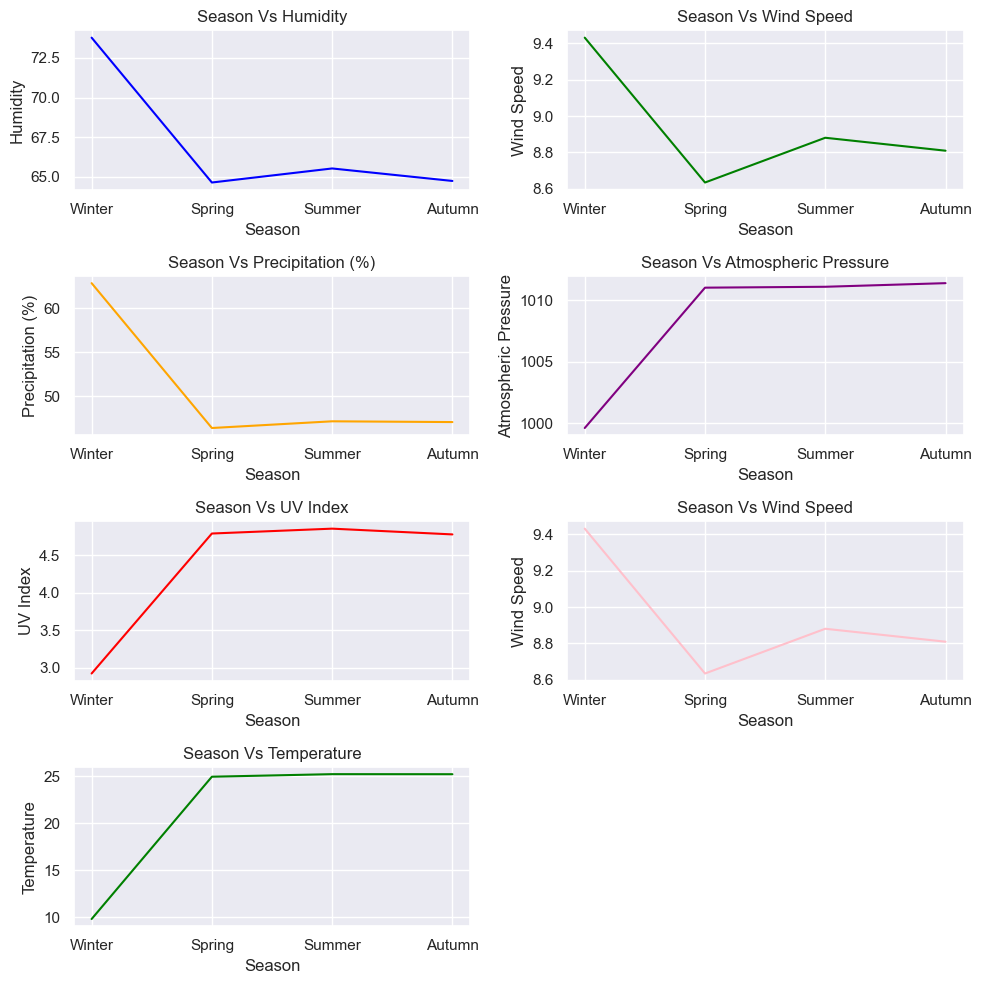

In [50]:
plt.figure(figsize =(10,10))

plt.subplot(4,2,1)
sns.lineplot(x = 'Season', y ='Humidity',data = df,color = 'blue',ci = None)
plt.title("Season Vs Humidity")

plt.subplot(4,2,2)
sns.lineplot(x = 'Season', y ='Wind Speed', data =df,color = 'green',ci = None)
plt.title("Season Vs Wind Speed")

plt.subplot(4,2,3)
sns.lineplot(x = 'Season', y ='Precipitation (%)', data =df,color = 'orange',ci = None)
plt.title("Season Vs Precipitation (%)")

plt.subplot(4,2,4)        
sns.lineplot(x = 'Season', y ='Atmospheric Pressure', data =df,color = 'purple',ci = None)
plt.title("Season Vs Atmospheric Pressure")

plt.subplot(4,2,5)        
sns.lineplot(x = 'Season', y ='UV Index', data =df,color = 'red',ci = None)
plt.title("Season Vs UV Index")

plt.subplot(4,2,6)
sns.lineplot(x = 'Season', y ='Wind Speed', data =df,color = 'pink',ci = None)
plt.title("Season Vs Wind Speed")

plt.subplot(4,2,7)
sns.lineplot(x = 'Season', y ='Temperature', data =df,color = 'green',ci = None)
plt.title("Season Vs Temperature")

plt.tight_layout()
plt.show()

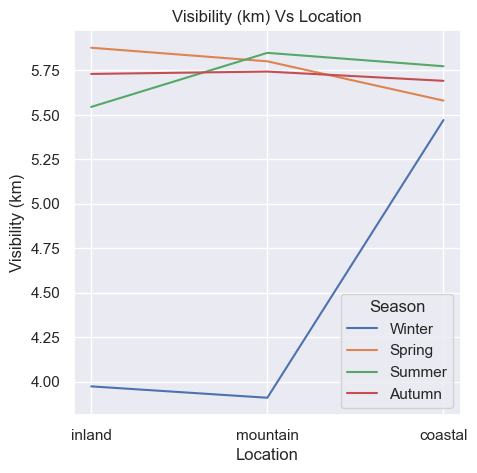

In [53]:
## Visibility (km) in each location in Season

plt.figure(figsize = (5,5))
sns.lineplot(y = "Visibility (km)", x= "Location",hue ='Season', data = df,ci= None)
plt.title("Visibility (km) Vs Location")
plt.show()

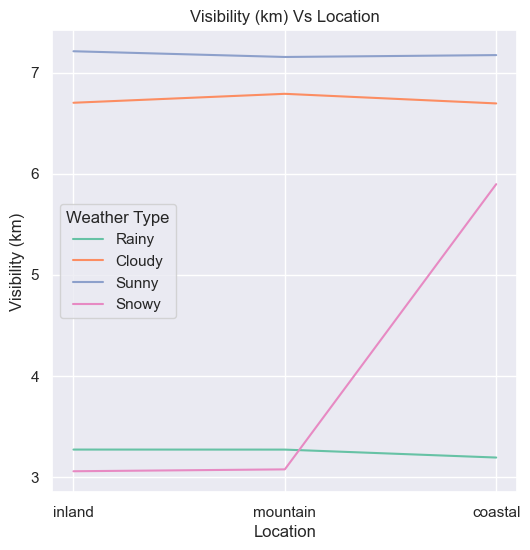

In [54]:
## Visibility (km) in each location in Weather Type

plt.figure(figsize = (6,6))
sns.lineplot(y = "Visibility (km)", x= "Location",hue ='Weather Type', data = df, palette="Set2",color = 'purple',ci= None)
plt.title("Visibility (km) Vs Location")
plt.show()

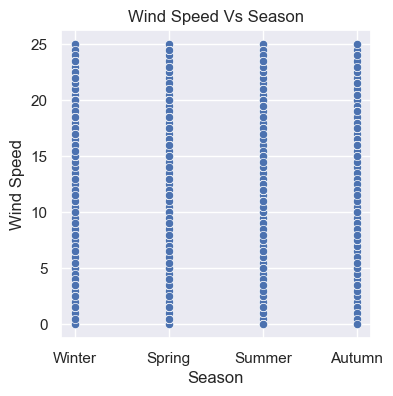

In [55]:
plt.figure(figsize = (4,4))
sns.scatterplot(y = "Wind Speed", x= "Season", data = df, palette="Set2")
plt.title("Wind Speed Vs Season")
plt.show()

## HISTOGRAM

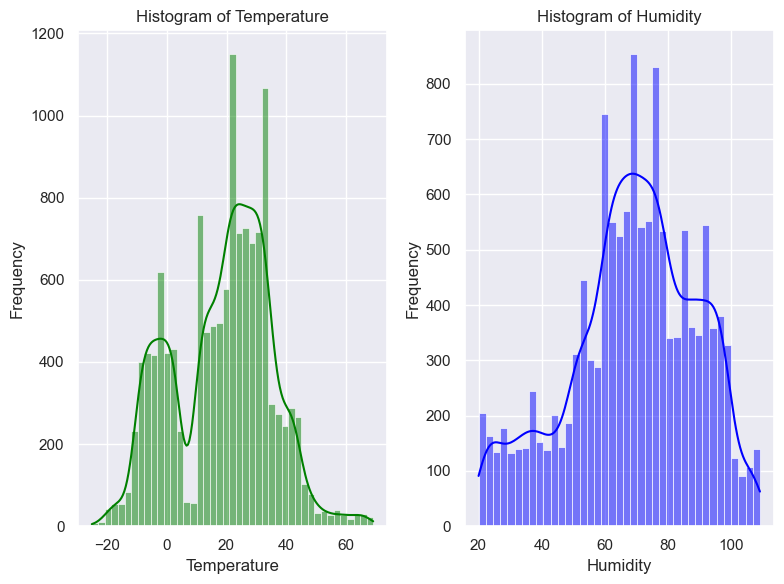

In [56]:
plt.figure(figsize = (8,6))

# Histogram for Temperature
plt.subplot(1,2,1)
sns.histplot(x = 'Temperature', data = df,kde = True,color = 'green')
plt.title("Histogram of Temperature")
plt.ylabel('Frequency')

# Histogram for Humidity
plt.subplot(1,2,2)
sns.histplot(x = 'Humidity', data = df,kde = True,color = 'blue')
plt.title("Histogram of Humidity")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

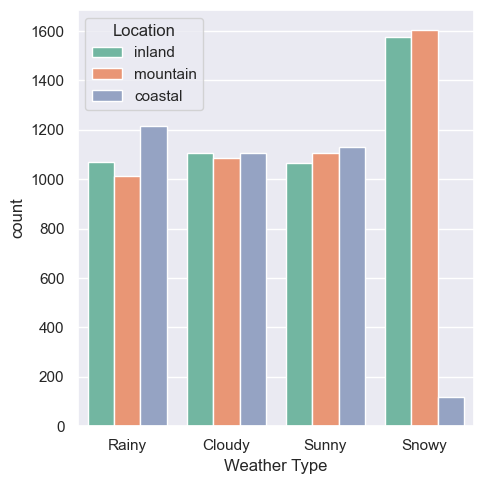

In [74]:
plt.figure(figsize = (5,5))
ax= sns.countplot(x = "Weather Type", hue = "Location", data = df, palette="Set2")
plt.tight_layout()
plt.show()

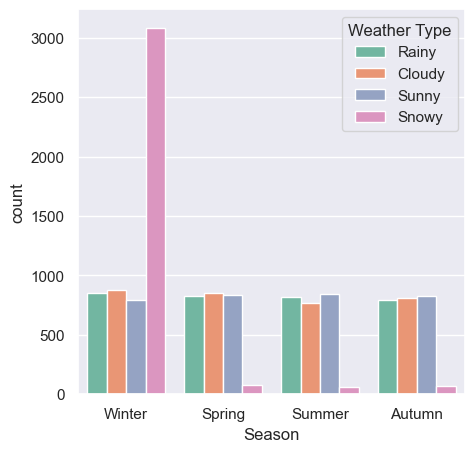

In [75]:
plt.figure(figsize = (5,5))
sns.countplot(x = "Season", hue = "Weather Type", data = df, palette="Set2")
plt.show()

## SCATTER PLOT

#### 1. Temperature vs. Humidity

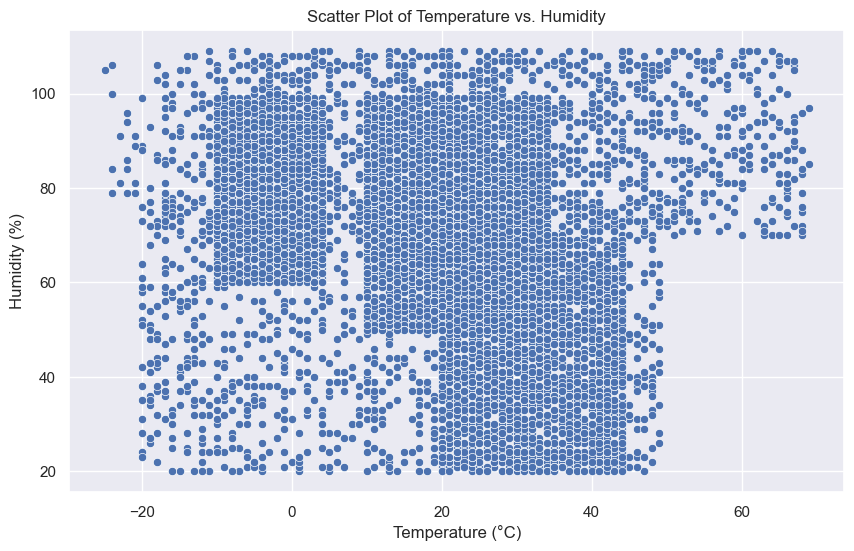

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature'], y=df['Humidity'])
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

#### 2. Wind Speed vs. Atmospheric Pressure

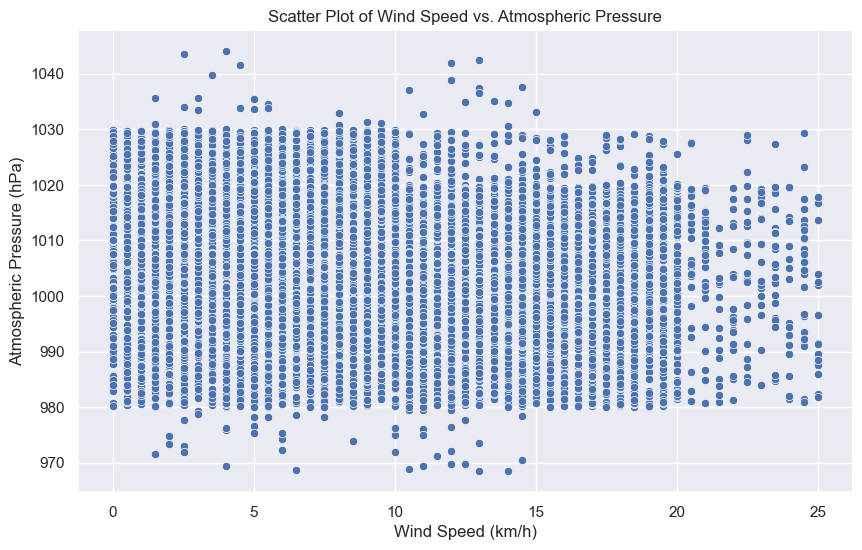

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Wind Speed'], y=df['Atmospheric Pressure'])
plt.title('Scatter Plot of Wind Speed vs. Atmospheric Pressure')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Atmospheric Pressure (hPa)')
plt.show()

#### 3. Temperature vs. Visibility

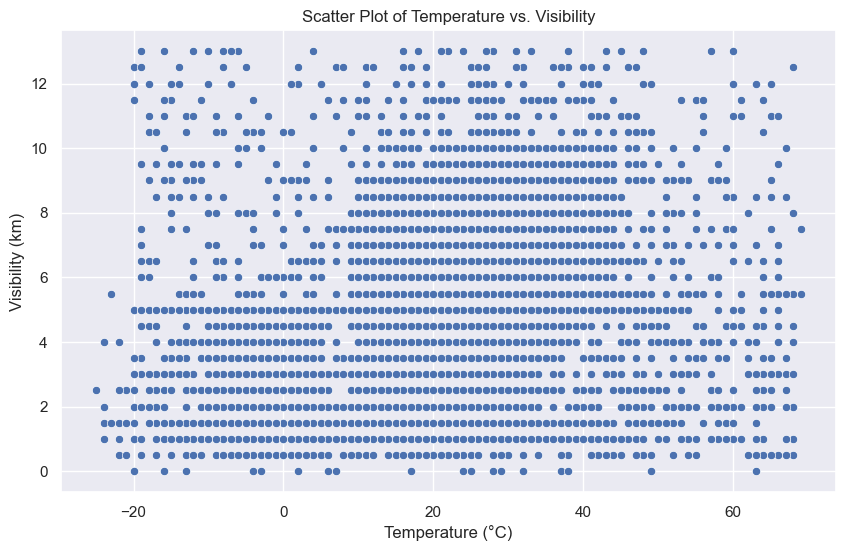

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature'], y=df['Visibility (km)'])
plt.title('Scatter Plot of Temperature vs. Visibility')
plt.xlabel('Temperature (°C)')
plt.ylabel('Visibility (km)')
plt.show()

#### 4. Humidity vs. Precipitation (%)

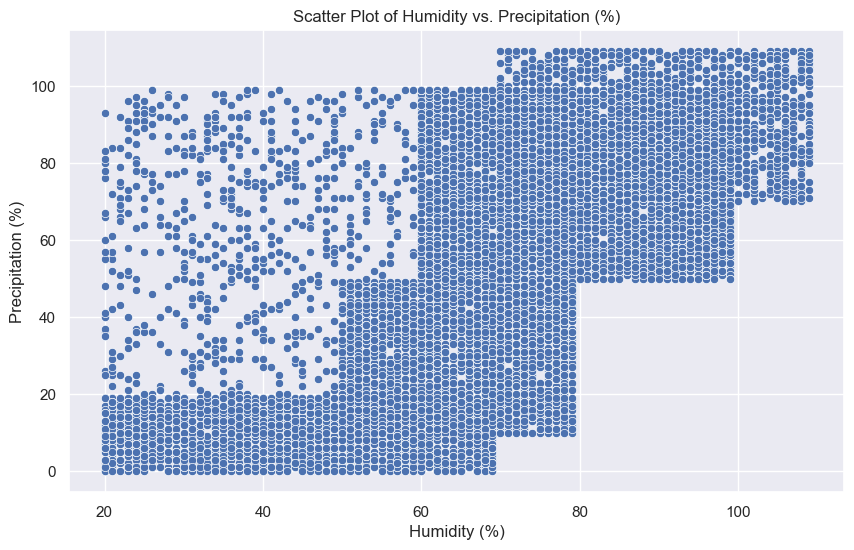

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Humidity'], y=df['Precipitation (%)'])
plt.title('Scatter Plot of Humidity vs. Precipitation (%)')
plt.xlabel('Humidity (%)')
plt.ylabel('Precipitation (%)')
plt.show()

## CONTINGENCY TABLE

In [65]:
contingency_table = pd.crosstab(df['Season'], df['Weather Type'])

print(contingency_table)

Weather Type  Cloudy  Rainy  Snowy  Sunny
Season                                   
Autumn           806    796     69    829
Spring           850    831     80    837
Summer           766    820     65    841
Winter           878    853   3086    793


## TREND ANALYSIS

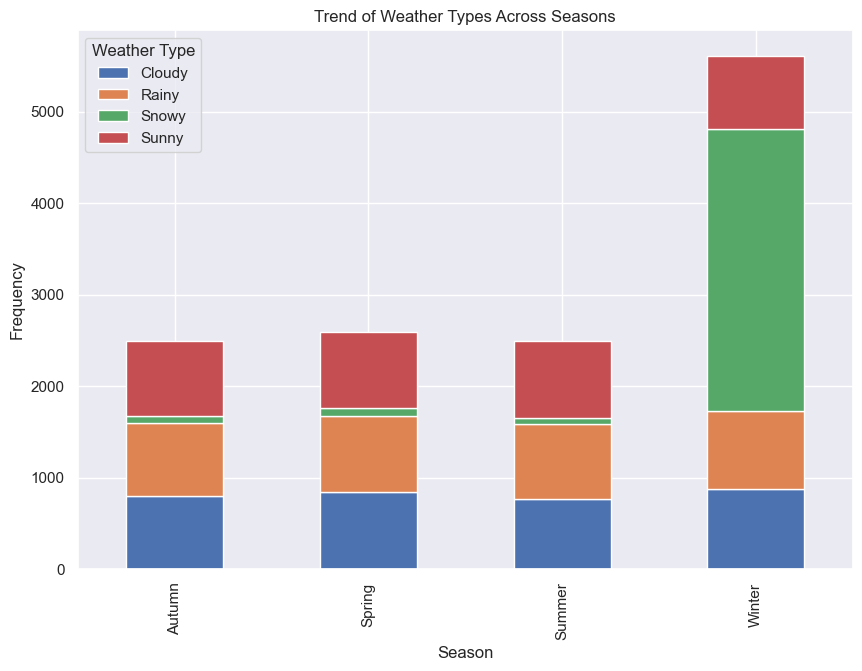

In [66]:
# Plotting the trend
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding title and labels
plt.title('Trend of Weather Types Across Seasons')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.legend(title='Weather Type')

# Show the plot
plt.show()

## PCA - Principal Component Analysis

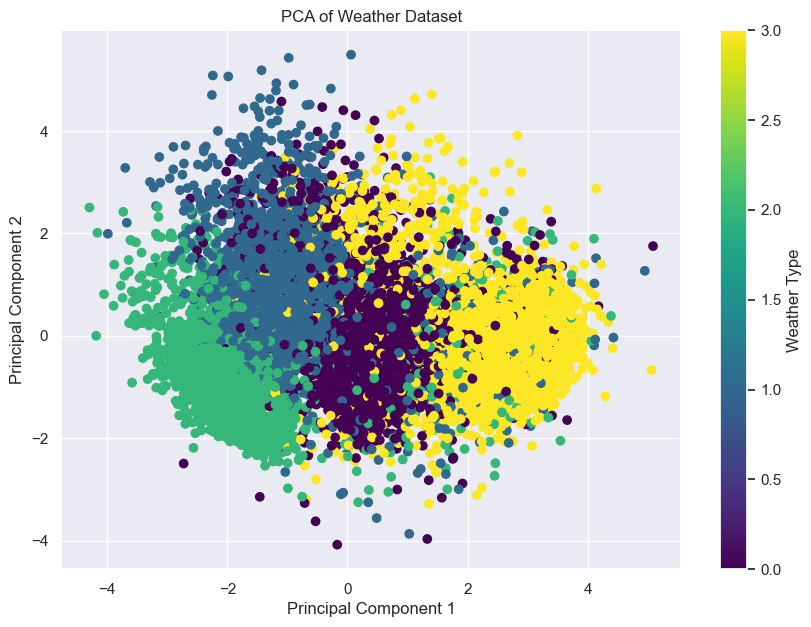

Temperature   Humidity  Wind Speed  Precipitation (%)  \
Weather Type                                                          
0               22.823636  66.528788    8.601818          40.286364   
1               22.788182  78.397879   13.677576          74.752424   
2               -1.530606  78.510303   10.976212          74.586061   
3               32.429091  51.406364    6.073182          24.952727   

              Cloud Cover  Atmospheric Pressure  UV Index    Season  \
Weather Type                                                          
0                2.548788           1010.170724  3.583939  1.520000   
1                2.271818           1004.149848  2.684242  1.524242   
2                2.180909            991.051842  1.950303  2.869091   
3                0.959394           1017.939170  7.804545  1.484242   

              Visibility (km)  Location  
Weather Type                             
0                    7.071212  0.994242  
1                    3.628485  0.939091  
2                    3.591515  1.450000  
3                    7.560455  0.993030

In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Weather_Type.csv')

# Convert categorical variables to numerical values
df['Season'] = df['Season'].astype('category').cat.codes
df['Cloud Cover'] = df['Cloud Cover'].astype('category').cat.codes
df['Location'] = df['Location'].astype('category').cat.codes
df['Weather Type'] = df['Weather Type'].astype('category').cat.codes

# Select features for PCA
features = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
               'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Add the target variable (Weather Type) for coloring in the plot
pca_df['Weather Type'] = df['Weather Type']

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Weather Type'], cmap='viridis')
plt.colorbar(label='Weather Type')
plt.title('PCA of Weather Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Variance explained by each component
variance_explained = pca.explained_variance_ratio_

variance_explained

cluster_analysis = df.groupby('Weather Type').mean()

cluster_analysis

## Pair Plot

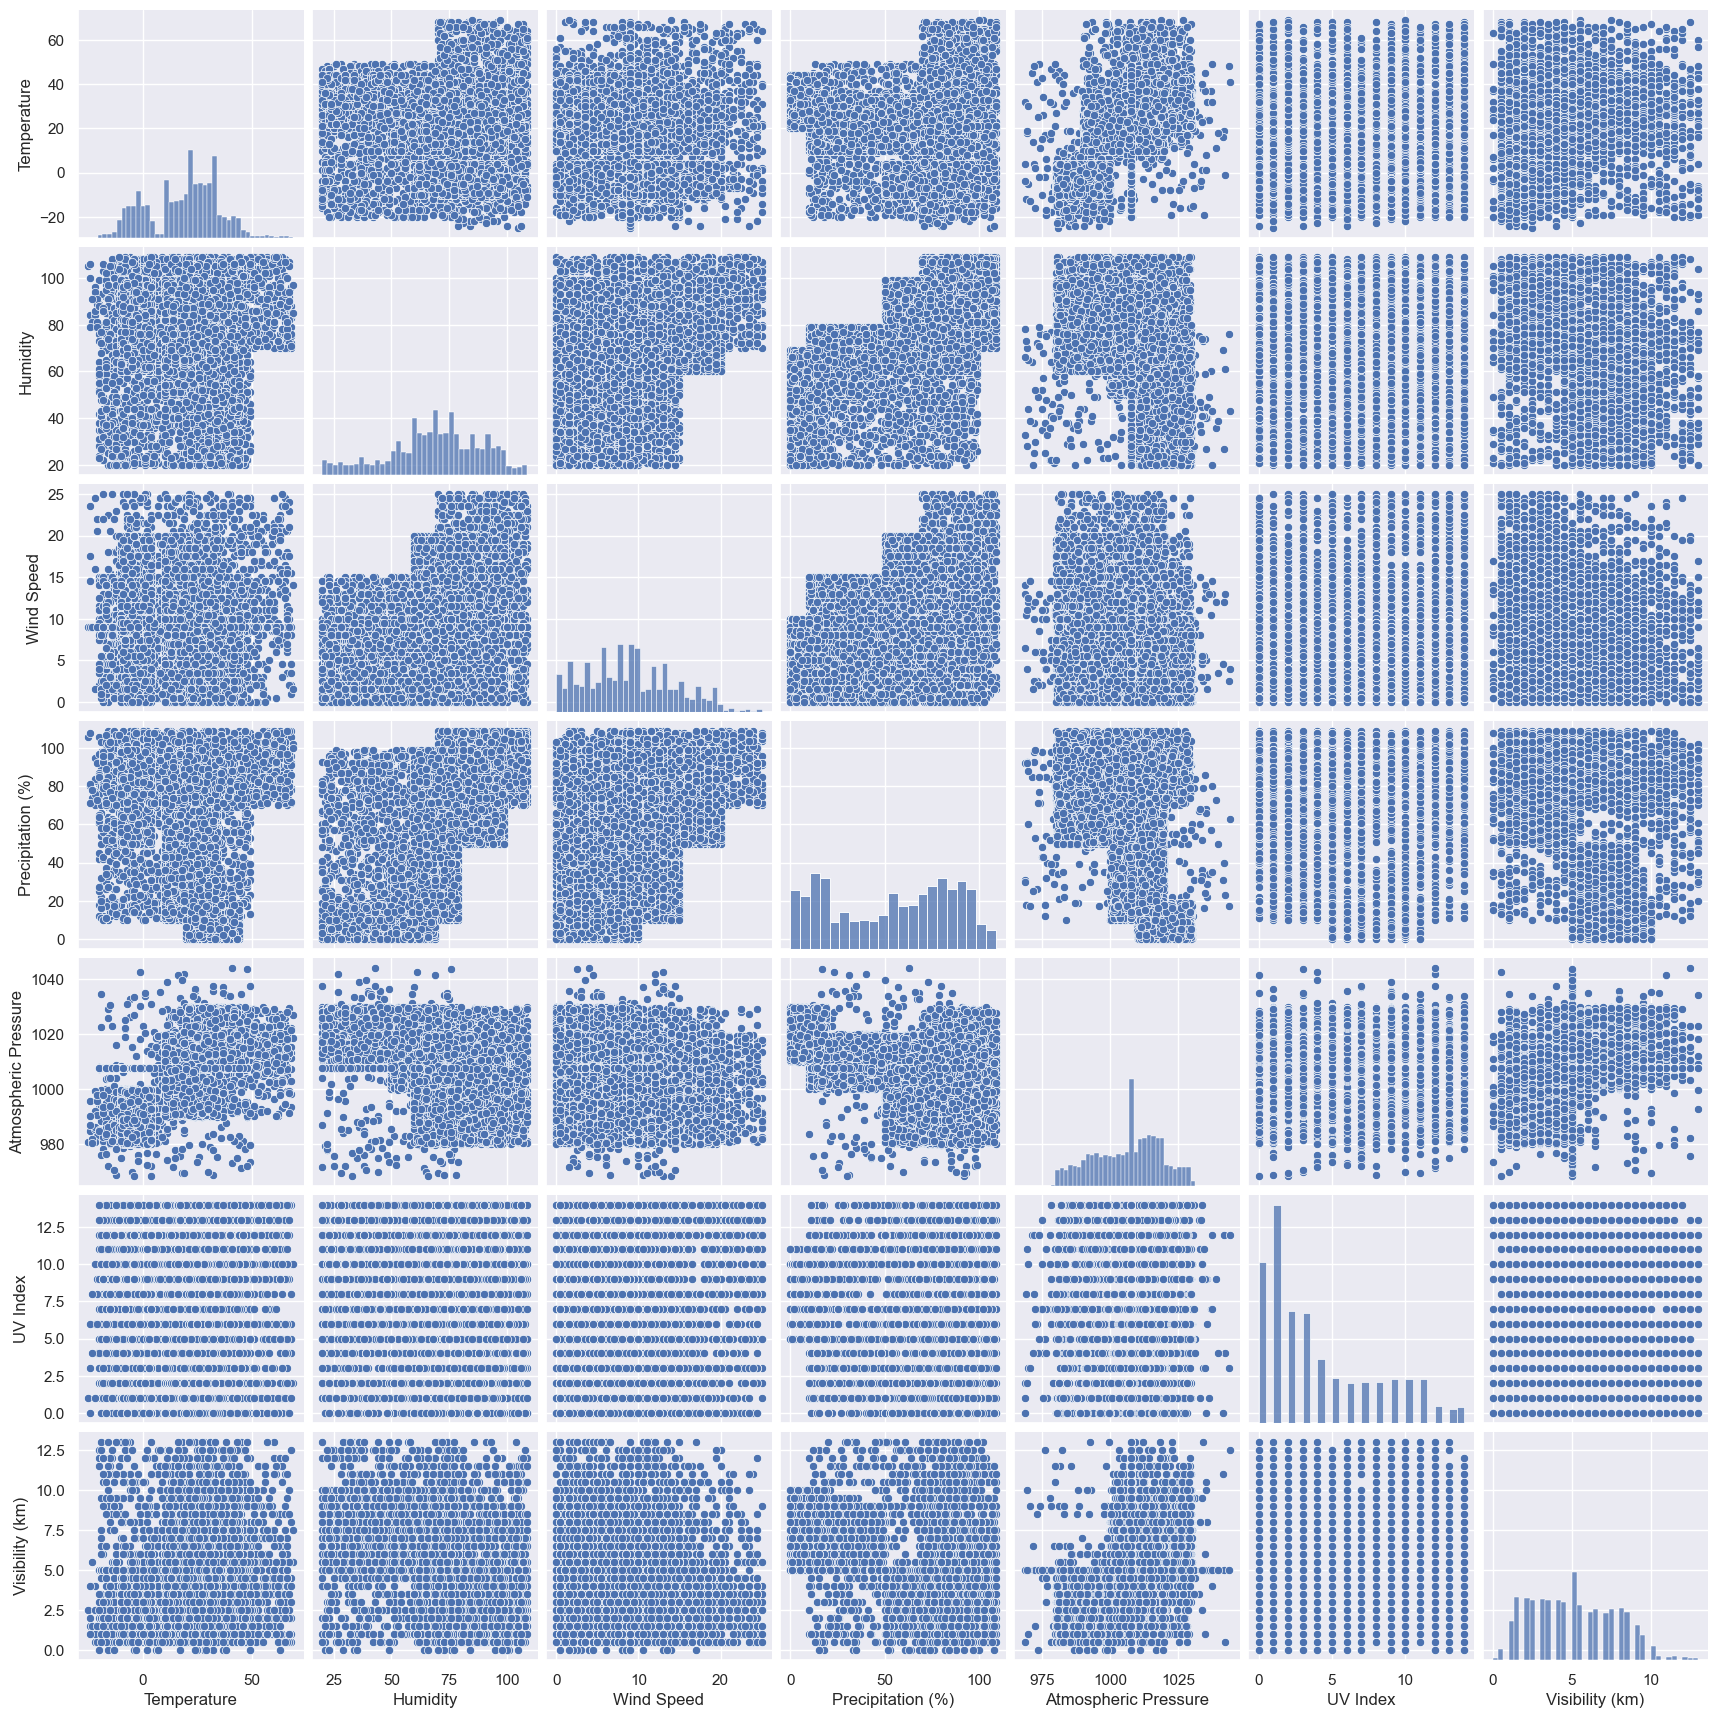

In [57]:
sns.pairplot(df)
plt.show()

## Heat Map

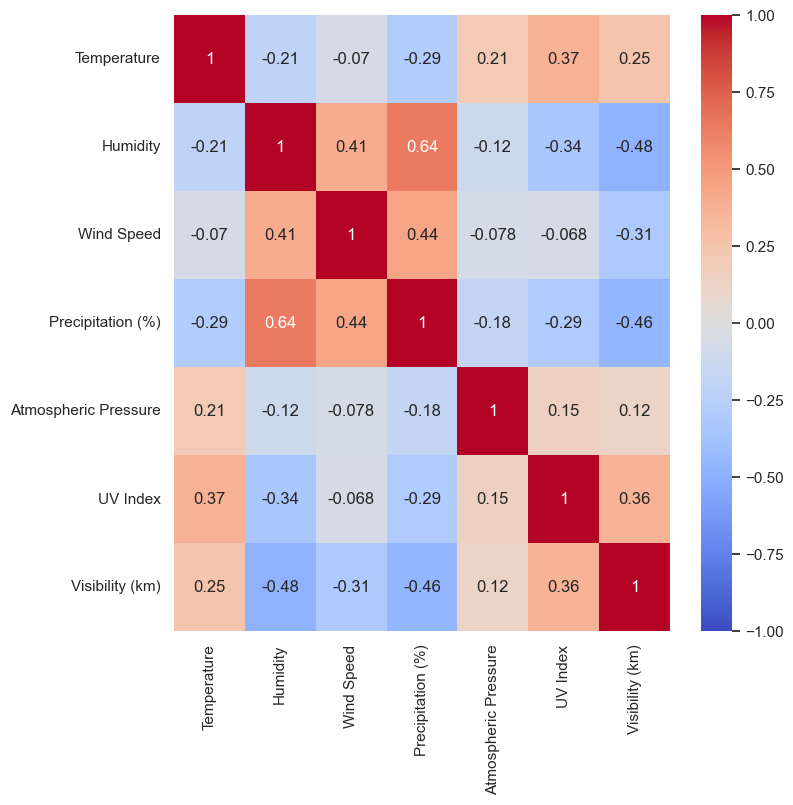

In [58]:
plt.figure(figsize =(8,8))
sns.heatmap(numerical_col.corr(),annot = True,vmin = -1,vmax = 1,cmap = 'coolwarm')
plt.show()

## REGRESSION ANALYSIS

In [77]:
import statsmodels.api as sm

# Linear regression to predict Temperature based on Humidity, Wind Speed, and Precipitation
X = df[['Humidity', 'Wind Speed', 'Precipitation (%)']]  # Independent variables
y = df['Temperature']  # Dependent variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()

# Summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     427.2
Date:                Wed, 21 Aug 2024   Prob (F-statistic):          6.50e-265
Time:                        22:30:01   Log-Likelihood:                -55813.
No. Observations:               13200   AIC:                         1.116e+05
Df Residuals:                   13196   BIC:                         1.117e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                28.9192      0.52

Accuracy: 0.8674242424242424

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       955
           1       0.84      0.88      0.86       982
           2       0.89      0.94      0.92      1033
           3       0.88      0.83      0.85       990

    accuracy                           0.87      3960
   macro avg       0.87      0.87      0.87      3960
weighted avg       0.87      0.87      0.87      3960



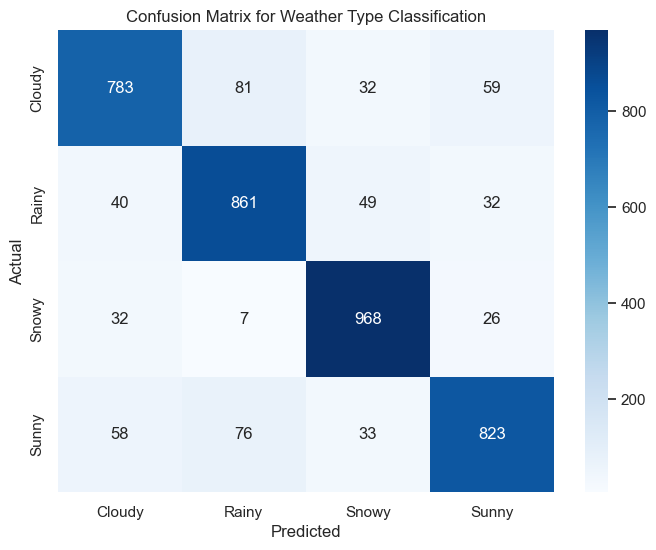

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Weather_Type.csv')

# Convert categorical variables to numerical values
label_encoder = LabelEncoder()
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Cloud Cover'] = label_encoder.fit_transform(df['Cloud Cover'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Weather Type'] = label_encoder.fit_transform(df['Weather Type'])

# Select features and target variable
features = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
               'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location']]
target = df['Weather Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the accuracy, classification report, and confusion matrix
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Weather Type Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.8757575757575757

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       955
           1       0.87      0.88      0.88       982
           2       0.91      0.94      0.93      1033
           3       0.87      0.84      0.85       990

    accuracy                           0.88      3960
   macro avg       0.87      0.87      0.87      3960
weighted avg       0.88      0.88      0.88      3960



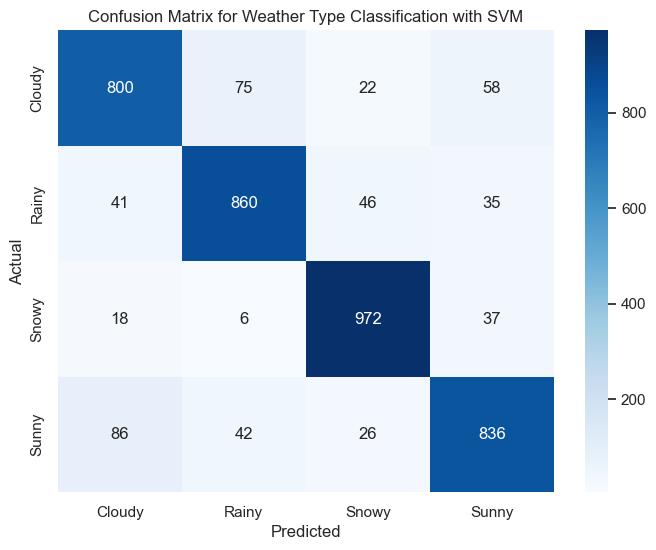

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Weather_Type.csv')

# Convert categorical variables to numerical values
label_encoder = LabelEncoder()
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Cloud Cover'] = label_encoder.fit_transform(df['Cloud Cover'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Weather Type'] = label_encoder.fit_transform(df['Weather Type'])

# Select features and target variable
features = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
               'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location']]
target = df['Weather Type']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Train a Support Vector Machine Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the accuracy, classification report, and confusion matrix
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Weather Type Classification with SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## STATISTICAL ANALYSIS

#### One-Way ANNOVA

#### Temperature vs Weather Type

In [82]:
import pandas as pd
import scipy.stats as stats

# Load the CSV file
file_path = 'Weather_Type.csv'
data = pd.read_csv(file_path)

# One-Way ANOVA: Testing if Temperature varies significantly across different Weather Types
anova_result = stats.f_oneway(*[data['Temperature'][data['Weather Type'] == wt] for wt in data['Weather Type'].unique()])

# Output the ANOVA result
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


F-statistic: 4797.673502910207, p-value: 0.0


#### Humidity vs Weather Type

In [84]:
import pandas as pd
import scipy.stats as stats

# Load the CSV file
file_path = 'Weather_Type.csv'
data = pd.read_csv(file_path)

# One-Way ANOVA: Testing if Temperature varies significantly across different Weather Types
anova_result = stats.f_oneway(*[data['Humidity'][data['Weather Type'] == wt] for wt in data['Weather Type'].unique()])

# Output the ANOVA result
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

F-statistic: 1911.3513730898796, p-value: 0.0


## Chi2-Squared test

#### Cloud cover vs Weather Type

In [83]:
import pandas as pd
import scipy.stats as stats

# Load the CSV file
file_path = 'Weather_Type.csv'
data = pd.read_csv(file_path)

# Create a contingency table for Cloud Cover vs. Weather Type
contingency_table = pd.crosstab(data['Cloud Cover'], data['Weather Type'])

# Perform the Chi-Squared test
chi2_result = stats.chi2_contingency(contingency_table)

# Output the Chi-Squared result
print(f"Chi2-statistic: {chi2_result[0]}, p-value: {chi2_result[1]}")
print(f"Degrees of Freedom: {chi2_result[2]}")
print("Expected Frequencies:\n", chi2_result[3])


Chi2-statistic: 9407.359261039586, p-value: 0.0
Degrees of Freedom: 9
Expected Frequencies:
 [[ 534.75  534.75  534.75  534.75]
 [ 102.75  102.75  102.75  102.75]
 [1522.5  1522.5  1522.5  1522.5 ]
 [1140.   1140.   1140.   1140.  ]]
